In [25]:
import cv2
import numpy as np 
from matplotlib import pyplot as plt

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

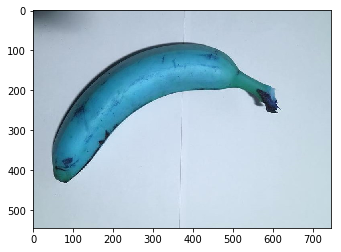

In [26]:
# read image
img = cv2.imread('./images/banana1.jpg')
plt.imshow(img)

In [27]:
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), 127, 255, cv2.THRESH_BINARY)
# find contours
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [28]:
# with each contour, draw boundingRect in green
# a minAreaRect in blue
minAreaRect = []
boxes = []

for i,c in enumerate(contours):
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    rect = cv2.minAreaRect(c);
    box = cv2.boxPoints(rect);
    # convert all coordinates floating point values to int
    box = np.int0(box)
    minAreaRect = box
    boxes.append((i,box,w,h))
    # draw a blue 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255), 3)

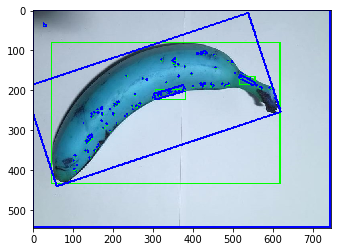

In [29]:
#show image with all the contours detected
plt.imshow(img)

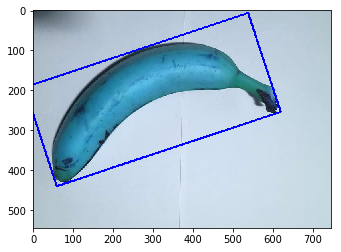

In [30]:
#order all the contours by area from biggest to smallest
boxes.sort(key=lambda x: x[2]*x[3], reverse=True)

#now we want to select the second biggest box (since the biggest one is the contour of the whole image)
minAreaRectangle = boxes[1][1]
minAreaRectangleIndex = boxes[1][0]

#show that this is the contour we want
imgWithBox = cv2.imread('./images/banana1.jpg')
cv2.drawContours(imgWithBox, [minAreaRectangle], 0, (0, 0, 255), 3)
plt.imshow(imgWithBox)

In [31]:
#get x and y points and width/height of the countour we selected
x,y,w,h = cv2.boundingRect(contours[minAreaRectangleIndex])
w,h

(572, 354)